Probleem 1


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("/content/diabetes_.csv")
print("\\nFirst 5 rows of the dataset:")
print(data.head())

print("\\nDataset Shape:", data.shape)
print("\\nData Types:")
print(data.dtypes)

print("\\nSummary Statistics:")
print(data.describe())

print("\\nMissing Values:")
print(data.isnull().sum())

print("\\nClass Distribution:")
print(data['Outcome'].value_counts())

\nFirst 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
\nDataset Shape: (768, 9)
\nData Types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigree

In [11]:
missing_info = data.isnull().sum() / len(data) * 100
print("\\nPercentage of missing values per column:")
print(missing_info)

for column in data.columns:
    if missing_info[column] > 10:
        data[column].fillna(data[column].mean(), inplace=True)
    elif missing_info[column] > 0:
        data.dropna(subset=[column], inplace=True)

print("\\nMissing values after handling:", data.isnull().sum().sum())

\nPercentage of missing values per column:
Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64
\nMissing values after handling: 0


In [13]:
X = data.drop(columns=['Outcome']).values
y = data['Outcome'].values

print(f"\\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")


def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)

print(f"\\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

\nFeature matrix shape: (768, 8)
Target vector shape: (768,)
\nTraining set size: 538
Test set size: 230


In [15]:
def euclidean_distance(point1, point2):
    if point1.shape != point2.shape:
        raise ValueError("Points must have the same dimensions")
    distance = np.sqrt(np.sum((point1 - point2) ** 2))
    return distance

def knn_predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]
    sorted_indices = np.argsort(distances)
    nearest_indices = sorted_indices[:k]
    nearest_labels = y_train[nearest_indices]
    prediction = np.bincount(nearest_labels).argmax()
    return prediction

def knn_predict(X_test, X_train, y_train, k=3):
    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)

def compute_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy

print("\\nMaking predictions with k=3...")
predictions = knn_predict(X_test, X_train, y_train, k=3)

accuracy = compute_accuracy(y_test, predictions)
print(f"\\nAccuracy of KNN (k=3) on original data: {accuracy:.2f}%")

print("\\nSample Predictions (first 10):")
print(f"Predicted: {predictions[:10]}")
print(f"Actual:    {y_test[:10]}")

\nMaking predictions with k=3...
\nAccuracy of KNN (k=3) on original data: 67.39%
\nSample Predictions (first 10):
Predicted: [0 1 0 1 1 1 0 0 1 1]
Actual:    [0 0 0 0 0 0 0 0 0 0]


Problem 2

In [24]:
def min_max_scale(X):
    X_scaled = np.zeros_like(X, dtype=float)
    for i in range(X.shape[1]):
        col_min = X[:, i].min()
        col_max = X[:, i].max()
        if col_max - col_min != 0:
            X_scaled[:, i] = (X[:, i] - col_min) / (col_max - col_min)
        else:
            X_scaled[:, i] = 0
    return X_scaled
    print("\\nScaling features using Min-Max normalization...")
X_train_scaled = min_max_scale(X_train)
X_test_scaled = min_max_scale(X_test)

print(f"\\nOriginal data range (first feature):")
print(f"  Min: {X_train[:, 0].min():.2f}, Max: {X_train[:, 0].max():.2f}")
print(f"\\nScaled data range (first feature):")
print(f"  Min: {X_train_scaled[:, 0].min():.2f}, Max: {X_train_scaled[:, 0].max():.2f}")

\nOriginal data range (first feature):
  Min: 0.00, Max: 17.00
\nScaled data range (first feature):
  Min: 0.00, Max: 1.00


In [25]:
print("\\nMaking predictions on scaled data with k=3...")
predictions_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train, k=3)

accuracy_scaled = compute_accuracy(y_test, predictions_scaled)
print(f"Accuracy of KNN (k=3) on scaled data: {accuracy_scaled:.2f}%")

\nMaking predictions on scaled data with k=3...
Accuracy of KNN (k=3) on scaled data: 70.87%


In [28]:
print(f"\\nOriginal Data Accuracy: {accuracy:.2f}%")
print(f"Scaled Data Accuracy:   {accuracy_scaled:.2f}%")
print(f"Improvement:            {accuracy_scaled - accuracy:.2f}%")

print("\\n--- Analysis ---")
print("Impact of Scaling on KNN Performance")


\nOriginal Data Accuracy: 67.39%
Scaled Data Accuracy:   70.87%
Improvement:            3.48%
\n--- Analysis ---
Impact of Scaling on KNN Performance


Problem 3

In [29]:
k_values = range(1, 16)
results_original = {'k': [], 'accuracy': [], 'time': []}
results_scaled = {'k': [], 'accuracy': [], 'time': []}

print("\\nRunning experiments for k = 1 to 15...")
print("\\nOriginal Data:")
print("-" * 50)

for k in k_values:
    # Original data
    start_time = time.time()
    predictions = knn_predict(X_test, X_train, y_train, k=k)
    elapsed_time = time.time() - start_time
    accuracy = compute_accuracy(y_test, predictions)

    results_original['k'].append(k)
    results_original['accuracy'].append(accuracy)
    results_original['time'].append(elapsed_time)

    print(f"k={k:2d} | Accuracy: {accuracy:6.2f}% | Time: {elapsed_time:.4f}s")

print("\\nScaled Data:")
print("-" * 50)

for k in k_values:
    # Scaled data
    start_time = time.time()
    predictions_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train, k=k)
    elapsed_time = time.time() - start_time
    accuracy_scaled = compute_accuracy(y_test, predictions_scaled)

    results_scaled['k'].append(k)
    results_scaled['accuracy'].append(accuracy_scaled)
    results_scaled['time'].append(elapsed_time)

    print(f"k={k:2d} | Accuracy: {accuracy_scaled:6.2f}% | Time: {elapsed_time:.4f}s")


\nRunning experiments for k = 1 to 15...
\nOriginal Data:
--------------------------------------------------
k= 1 | Accuracy:  68.70% | Time: 0.5937s
k= 2 | Accuracy:  72.61% | Time: 0.5928s
k= 3 | Accuracy:  67.39% | Time: 0.5754s
k= 4 | Accuracy:  72.17% | Time: 0.6050s
k= 5 | Accuracy:  68.70% | Time: 0.9581s
k= 6 | Accuracy:  70.00% | Time: 0.5652s
k= 7 | Accuracy:  69.13% | Time: 0.5929s
k= 8 | Accuracy:  71.30% | Time: 0.5728s
k= 9 | Accuracy:  70.00% | Time: 0.5881s
k=10 | Accuracy:  71.74% | Time: 0.5776s
k=11 | Accuracy:  73.04% | Time: 0.5853s
k=12 | Accuracy:  73.91% | Time: 0.5974s
k=13 | Accuracy:  74.35% | Time: 0.5625s
k=14 | Accuracy:  72.61% | Time: 0.6703s
k=15 | Accuracy:  73.91% | Time: 0.9888s
\nScaled Data:
--------------------------------------------------
k= 1 | Accuracy:  70.00% | Time: 0.9964s
k= 2 | Accuracy:  70.43% | Time: 0.5690s
k= 3 | Accuracy:  70.87% | Time: 0.5865s
k= 4 | Accuracy:  71.74% | Time: 0.5821s
k= 5 | Accuracy:  71.74% | Time: 0.5864s
k= 6 

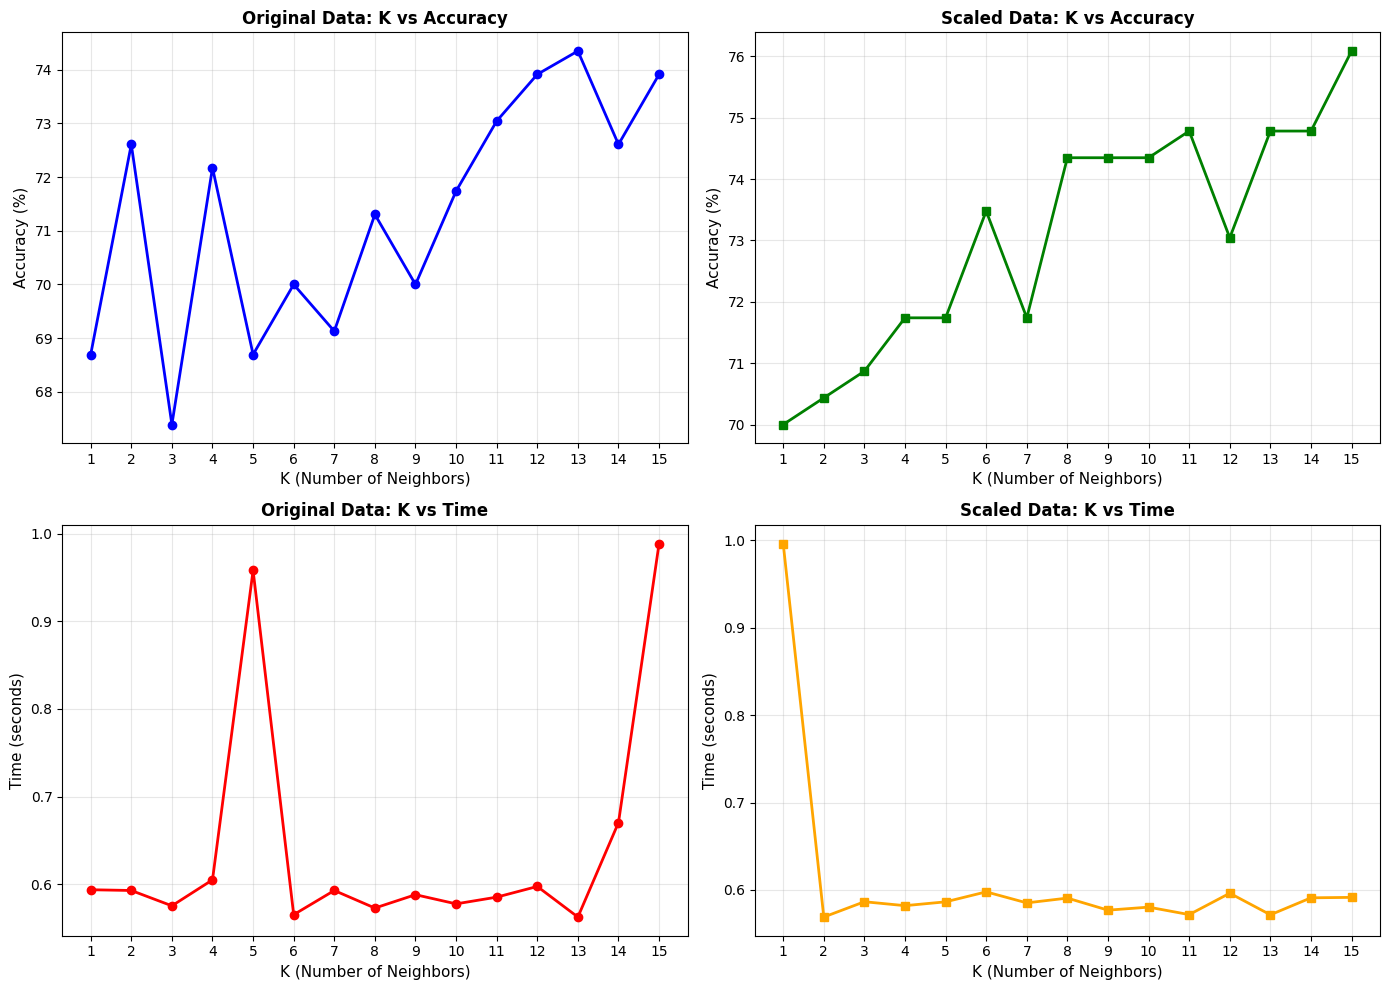

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes[0, 0].plot(results_original['k'], results_original['accuracy'],
                marker='o', color='blue', linewidth=2, markersize=6)
axes[0, 0].set_xlabel('K (Number of Neighbors)', fontsize=11)
axes[0, 0].set_ylabel('Accuracy (%)', fontsize=11)
axes[0, 0].set_title('Original Data: K vs Accuracy', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(k_values)
axes[0, 1].plot(results_scaled['k'], results_scaled['accuracy'],
                marker='s', color='green', linewidth=2, markersize=6)
axes[0, 1].set_xlabel('K (Number of Neighbors)', fontsize=11)
axes[0, 1].set_ylabel('Accuracy (%)', fontsize=11)
axes[0, 1].set_title('Scaled Data: K vs Accuracy', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks(k_values)
axes[1, 0].plot(results_original['k'], results_original['time'],
                marker='o', color='red', linewidth=2, markersize=6)
axes[1, 0].set_xlabel('K (Number of Neighbors)', fontsize=11)
axes[1, 0].set_ylabel('Time (seconds)', fontsize=11)
axes[1, 0].set_title('Original Data: K vs Time', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks(k_values)
axes[1, 1].plot(results_scaled['k'], results_scaled['time'],
                marker='s', color='orange', linewidth=2, markersize=6)
axes[1, 1].set_xlabel('K (Number of Neighbors)', fontsize=11)
axes[1, 1].set_ylabel('Time (seconds)', fontsize=11)
axes[1, 1].set_title('Scaled Data: K vs Time', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xticks(k_values)

plt.tight_layout()
plt.savefig('knn_experimentation_results.png', dpi=300, bbox_inches='tight')
plt.show()

In [43]:
optimal_k_original = results_original['k'][np.argmax(results_original['accuracy'])]
optimal_k_scaled = results_scaled['k'][np.argmax(results_scaled['accuracy'])]
max_acc_original = max(results_original['accuracy'])
max_acc_scaled = max(results_scaled['accuracy'])

print(f"Optimal K Values:")
print(f"  Original Data: k={optimal_k_original} with accuracy {max_acc_original:.2f}%")
print(f"  Scaled Data:   k={optimal_k_scaled} with accuracy {max_acc_scaled:.2f}%")

print(" Key Observations")


Optimal K Values:
  Original Data: k=13 with accuracy 74.35%
  Scaled Data:   k=15 with accuracy 76.09%
 Key Observations


Problem 4